<h3>note : coba hapus Healthy fish data jadi bias</h3>

<title>Identifikasi Penjakit pada ikan dengan cnn </title>
<br><hr>
Author : Bima Darmaja Suryatama

<h1>data pre</h1>

In [1]:
import pathlib
from google.colab import drive

drive.mount('/content/gdrive')
data_dir = "/content/gdrive/MyDrive/dataset"
data_dir = pathlib.Path(data_dir)

Mounted at /content/gdrive


In [2]:
!unzip /content/gdrive/MyDrive/dataset/archive_fish.zip -d data

Archive:  /content/gdrive/MyDrive/dataset/archive_fish.zip
  inflating: data/SB-Fish-Disease.csv  
  inflating: data/SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).jpeg  
  inflating: data/SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).jpg  
  inflating: data/SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).png  
  inflating: data/SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (10).jpg  
  inflating: data/SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (11).jpg  
  inflating: data/SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (12).jpg  
  inflating: data/SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (13).jpg  
  inflating: data/SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (15).jpg  
  inflating: data/SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial

In [3]:
import tensorflow as tf

In [5]:
data = tf.keras.utils.image_dataset_from_directory('data/SB-FishDisease/SB-FishDiseases')
# Get the class names
class_names = data.class_names
# Print the class names
print(class_names)
len(data)

Found 457 files belonging to 7 classes.
['Bacterial Red disease', 'Bacterial diseases - Aeromoniasis', 'Bacterial gill disease', 'Fungal diseases Saprolegniasis', 'Healthy Fish', 'Parasitic diseases', 'Viral diseases White tail disease']


15

In [6]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

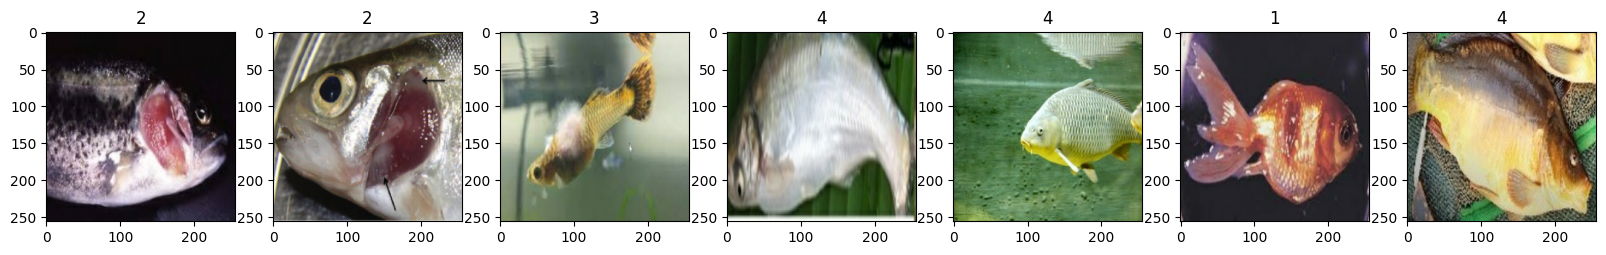

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(str(batch[1][idx]))

<h1>SPLIT DATA TRAIN VAL TEST</h1>

In [8]:
len(data)

15

In [9]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
# untuk tes
#train_size
#val_size
#test_size

2

In [10]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [11]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

<h1> modeling data </h1>

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [19]:
model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)       

In [21]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback

class AccuracyStopCallback(Callback):
    def __init__(self, target_accuracy=0.98):
        super(AccuracyStopCallback, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= self.target_accuracy:
            self.model.stop_training = True

# Create an instance of the AccuracyStopCallback
accuracy_stop_callback = AccuracyStopCallback(target_accuracy=0.98)

In [22]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[accuracy_stop_callback])

Epoch 1/30
10/10 [==============================] - 24s 2s/step - loss: 97.3069 - accuracy: 0.1906 - val_loss: 3.3112 - val_accuracy: 0.3828
Epoch 2/30
10/10 [==============================] - 26s 3s/step - loss: 1.9443 - accuracy: 0.3750 - val_loss: 1.5886 - val_accuracy: 0.4375
Epoch 3/30
10/10 [==============================] - 26s 3s/step - loss: 1.3105 - accuracy: 0.5781 - val_loss: 1.1437 - val_accuracy: 0.6172
Epoch 4/30
10/10 [==============================] - 25s 3s/step - loss: 1.0321 - accuracy: 0.7000 - val_loss: 0.6193 - val_accuracy: 0.8203
Epoch 5/30
10/10 [==============================] - 22s 2s/step - loss: 0.6430 - accuracy: 0.7688 - val_loss: 0.4870 - val_accuracy: 0.8828
Epoch 6/30
10/10 [==============================] - 24s 2s/step - loss: 0.4419 - accuracy: 0.8781 - val_loss: 0.2846 - val_accuracy: 0.9297
Epoch 7/30
10/10 [==============================] - 21s 2s/step - loss: 0.2790 - accuracy: 0.9281 - val_loss: 0.3013 - val_accuracy: 0.9531
Epoch 8/30
10/10 [=

<h1>Ploting data </h1>

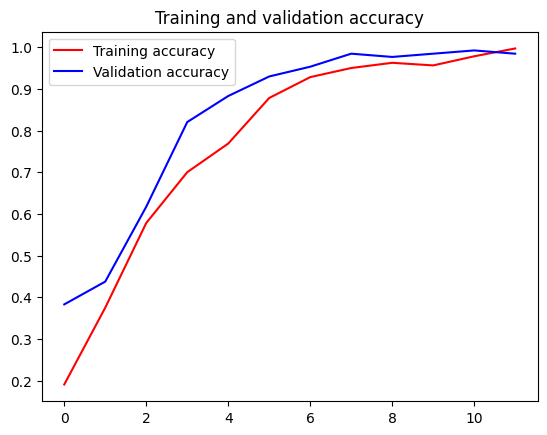

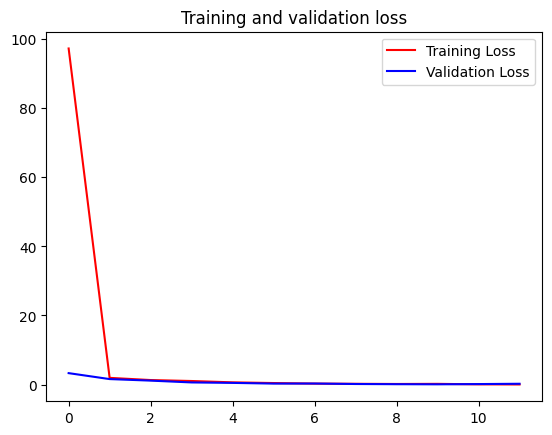

In [23]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<h1>TEST THE MODEL WITH INPUT IMAGE</h1>

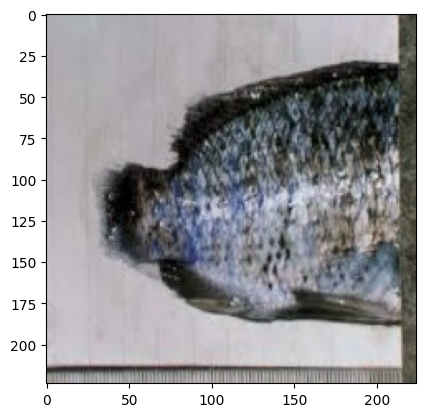

In [42]:
import cv2
import matplotlib

img_link = '/content/data/SB-FishDisease/SB-FishDiseases/Viral diseases White tail disease/Viral diseases White tail disease (19).jpg'
img = cv2.imread(img_link)
plt.imshow(img)
plt.show()

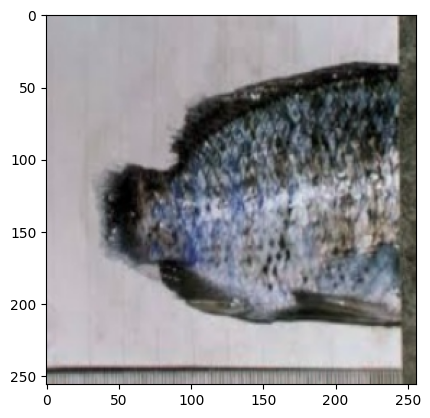

In [43]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [44]:
import numpy as np

# Preprocess the image
resized_image = resize / 255.0
input_image = np.expand_dims(resized_image, axis=0)

# Make predictions
yhat = model.predict(input_image)

# Get the predicted class index
predicted_class_index = np.argmax(yhat, axis=1)

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index[0]]

# Get the class probabilities
class_probabilities = yhat[0]

# Print the predicted class and probabilities
print("Predicted class:", predicted_class_name)
print("Class probabilities:", class_probabilities)

1/1 [==============================] - 0s 38ms/step
Predicted class: Healthy Fish
Class probabilities: [0.13927767 0.13683997 0.14237452 0.14470609 0.15110421 0.13881122
 0.14688633]
